# Synaptic Partner Prediction in FAFB

Analysis and visualization code to work with the synaptic partner predictions from Buhmann et al. 2019 and neuron
segmentation from Li et al. 2019.

November 2019, Stephan Gerhard <info@braincircuits.io> (Modified by Julia Buhmann - December 2019 and May 2020)

### Prerequisites

* Download the SQLite database dump of all synaptic partner predictions and store it locally:
    * [download link](https://cremi.org/static/data/20191211_fafbv14_buhmann2019_li20190805.db) (14 gb, 244 million putative synaptic links)
* Install the synful repository

In [1]:
from synful import QueryCircuit
import logging

logging.basicConfig(level=logging.INFO)

synaptic_predictions_dump_fname = '' # Put here the path to the downloaded file
seg_id = 7889893021
circuit =  QueryCircuit(synaptic_predictions_dump_fname)
circuit.init_with_seg_ids([seg_id])

INFO:synful.query_circuit:sql query: SELECT pre_x,pre_y,pre_z,post_x,post_y,post_z,scores,segmentid_pre,segmentid_post,cleft_scores from synlinks WHERE (segmentid_pre IN (7889893021)) OR (segmentid_post IN (7889893021));
INFO:synful.query_circuit:Loaded 5346 links


## Plot input output sites of a neuron segment

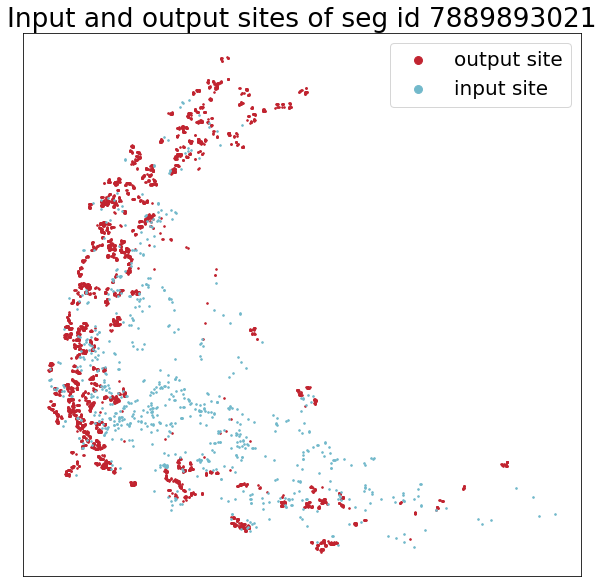

In [2]:
circuit.plot_input_output_sites(seg_id)

## Retrieve down and upstream neuron segments

/groups/funke/home/buhmannj/anaconda2/envs/fafb2/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/groups/funke/home/buhmannj/anaconda2/envs/fafb2/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


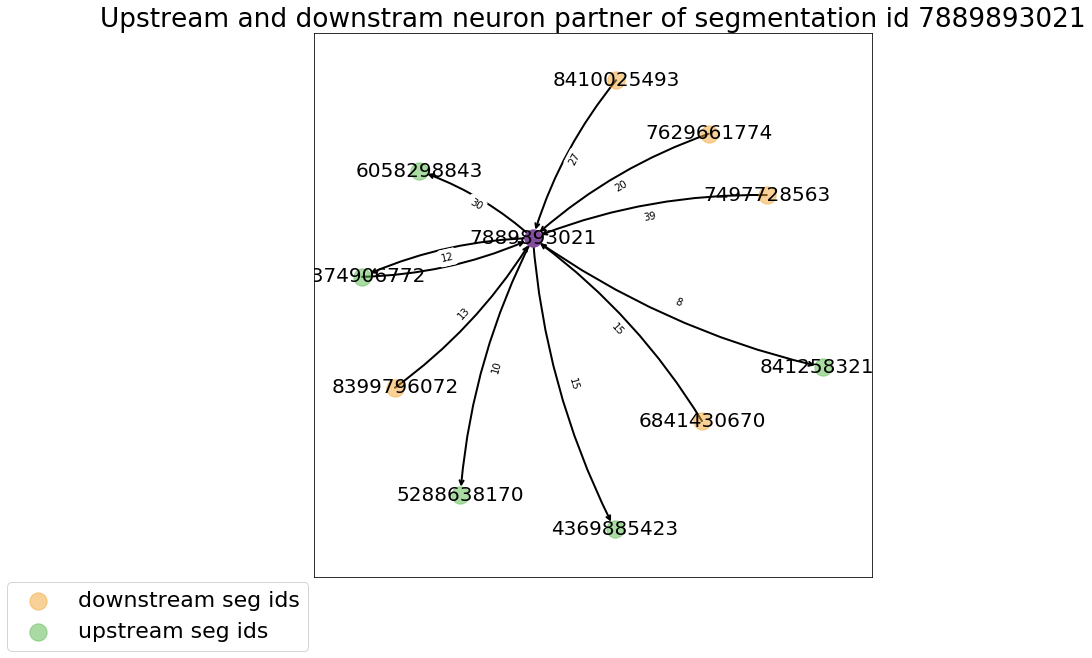

In [3]:
circuit.plot_up_downstream_subcircuit(seg_id, add_node_ids=True)

### Visualize up-and downstream neurons in neuroglancer


In [4]:
down_segids = circuit.get_downstream_partners(seg_id)
up_segids = circuit.get_upstream_partners(seg_id)
seg_ids = down_segids + up_segids + [seg_id]
circuit.ng_link(seg_ids)

## Explore the second-order circuit of a given segment

INFO:synful.query_circuit:sql query: SELECT pre_x,pre_y,pre_z,post_x,post_y,post_z,scores,segmentid_pre,segmentid_post,cleft_scores from synlinks WHERE (segmentid_pre IN (7889893021)) OR (segmentid_post IN (7889893021));
INFO:synful.query_circuit:Loaded 5346 links
INFO:synful.query_circuit:sql query: SELECT pre_x,pre_y,pre_z,post_x,post_y,post_z,scores,segmentid_pre,segmentid_post,cleft_scores from synlinks WHERE (segmentid_pre IN (7497728563,8410025493,7629661774,6841430670,8399796072,6058298843,4369885423,7374906772,5288638170,7889893021)) OR (segmentid_post IN (7497728563,8410025493,7629661774,6841430670,8399796072,6058298843,4369885423,7374906772,5288638170,7889893021));
INFO:synful.query_circuit:Loaded 41573 links


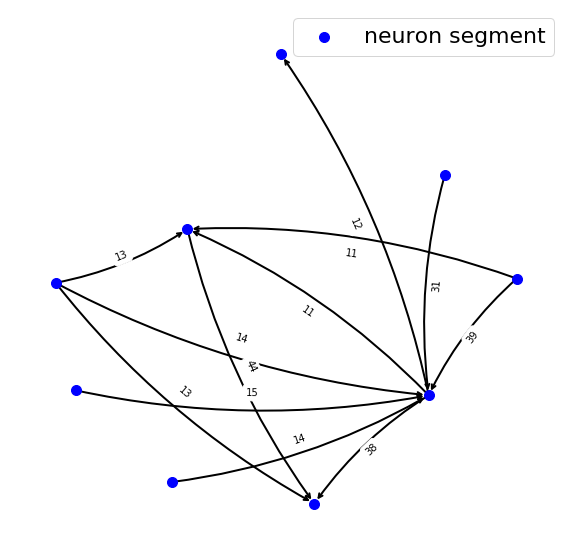

In [5]:
seg_id = 7889893021
weight_threshold = 10

circuit.init_with_seg_ids([seg_id])  
down_segids = circuit.get_downstream_partners(seg_id, weight_threshold=weight_threshold)
up_segids = circuit.get_upstream_partners(seg_id, weight_threshold=weight_threshold)
seg_ids = down_segids + up_segids + [seg_id]
circuit.init_with_seg_ids(seg_ids)
circuit.plot_circuit(seg_ids=seg_ids, weight_threshold=weight_threshold)

### Visualize neuron segments of circuit in neuroglancer

In [6]:
circuit.ng_link(seg_ids)